In [1]:
import os
import numpy as np
import shutil
import random
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
dataset = os.path.join(r'E:\project plan\indonesian food', '')

for dir in os.listdir(dataset):
  class_dir = os.path.join(dataset, dir)
  print('total images for', dir, 'is', len(os.listdir(class_dir)))

total images for Ayam Betutu is 211
total images for Bika Ambon is 212
total images for Empek-Empek is 212
total images for Gudeg is 220
total images for Gulai Ikan Patin is 200
total images for Kue Serabi is 200
total images for Lumpia is 223
total images for Mie Aceh is 210
total images for Rendang is 220
total images for Soto Banjar is 180


In [24]:
root_dir = 'E:/project plan/indonesian food/' 
classes_dir = os.listdir(root_dir)

train_ratio = 0.8
val_ratio  = 0.1

for cls in classes_dir:
    os.makedirs(root_dir +'train_dir/' + cls, exist_ok=True)
    os.makedirs(root_dir +'test_dir/' + cls, exist_ok=True)
    os.makedirs(root_dir +'val_dir/' + cls, exist_ok=True)
    
    src = root_dir + cls
    FileNames = os.listdir(src)

    np.random.shuffle(FileNames)
    train_FileNames, test_FileNames, val_FileNames = np.split(np.array(FileNames),
                                                              [int(train_ratio * len(FileNames)), 
                                                               int((1-val_ratio) * len(FileNames))])

    train_FileNames = [src+'/'+ name  for name in train_FileNames.tolist()]
    test_FileNames  = [src+'/' + name for name in test_FileNames.tolist()]
    val_FileNames   = [src+'/' + name for name in val_FileNames.tolist()]
    print("\n Total images: ",cls, len(FileNames),
          '\n Training: ', len(train_FileNames),
          '\n Testing: ', len(test_FileNames),
          '\n Validation: ', len(val_FileNames))
    
    for name in train_FileNames:
      shutil.copy(name, root_dir +'train_dir/' + cls)
    for name in test_FileNames:
      shutil.copy(name, root_dir +'test_dir/' + cls)
    for name in val_FileNames:
      shutil.copy(name, root_dir +'val_dir/' + cls)


 Total images:  Ayam Betutu 211 
 Training:  168 
 Testing:  21 
 Validation:  22

 Total images:  Bika Ambon 212 
 Training:  169 
 Testing:  21 
 Validation:  22

 Total images:  Empek-Empek 212 
 Training:  169 
 Testing:  21 
 Validation:  22

 Total images:  Gudeg 220 
 Training:  176 
 Testing:  22 
 Validation:  22

 Total images:  Gulai Ikan Patin 200 
 Training:  160 
 Testing:  20 
 Validation:  20

 Total images:  Kue Serabi 200 
 Training:  160 
 Testing:  20 
 Validation:  20

 Total images:  Lumpia 223 
 Training:  178 
 Testing:  22 
 Validation:  23

 Total images:  Mie Aceh 210 
 Training:  168 
 Testing:  21 
 Validation:  21

 Total images:  Rendang 220 
 Training:  176 
 Testing:  22 
 Validation:  22

 Total images:  Soto Banjar 180 
 Training:  144 
 Testing:  18 
 Validation:  18


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "E:/project plan/indonesian food/train_dir"
val_dir = "E:/project plan/indonesian food/val_dir"
test_dir = "E:/project plan/indonesian food/test_dir"

train_datagen = ImageDataGenerator(rescale = 1./255
                                   )

test_datagen  = ImageDataGenerator(rescale = 1.0/255
                                   )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator =  test_datagen.flow_from_directory(val_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size=(150, 150))

Found 1668 images belonging to 10 classes.
Found 212 images belonging to 10 classes.


In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 36, 36, 64)       

In [30]:
from keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=100,
                    verbose=1,
                    callbacks=early)

Epoch 1/100
84/84 [==============================] - 49s 575ms/step - loss: 2.2520 - accuracy: 0.1745 - val_loss: 2.1650 - val_accuracy: 0.2217
Epoch 2/100
84/84 [==============================] - 49s 577ms/step - loss: 1.9823 - accuracy: 0.2962 - val_loss: 1.9818 - val_accuracy: 0.3726
Epoch 3/100
84/84 [==============================] - 45s 531ms/step - loss: 1.7856 - accuracy: 0.3609 - val_loss: 1.8099 - val_accuracy: 0.3821
Epoch 4/100
84/84 [==============================] - 45s 534ms/step - loss: 1.6326 - accuracy: 0.4275 - val_loss: 1.7218 - val_accuracy: 0.4245
Epoch 5/100
84/84 [==============================] - 46s 546ms/step - loss: 1.5189 - accuracy: 0.4640 - val_loss: 1.6487 - val_accuracy: 0.4670
Epoch 6/100
84/84 [==============================] - 46s 548ms/step - loss: 1.4014 - accuracy: 0.5204 - val_loss: 1.5799 - val_accuracy: 0.5047
Epoch 7/100
84/84 [==============================] - 46s 545ms/step - loss: 1.2673 - accuracy: 0.5827 - val_loss: 1.4726 - val_accuracy:

Text(0.5, 1.0, 'Training and validation loss')

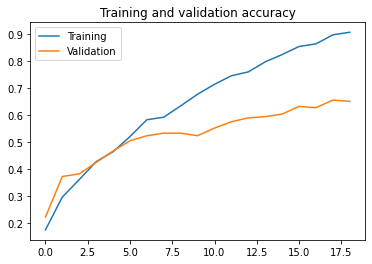

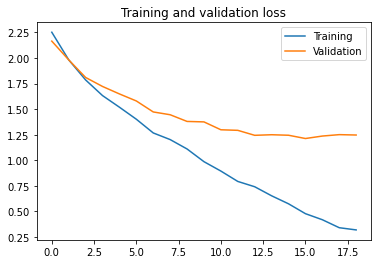

In [31]:
%matplotlib inline

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=20
)

Found 207 images belonging to 10 classes.


In [32]:
results = model.evaluate(test_generator)

11/11 [==============================] - 3s 283ms/step - loss: 1.1032 - accuracy: 0.6763


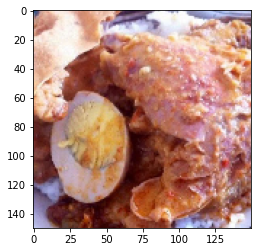

Ayam Betutu: 0.60%
Bika Ambon: 0.00%
Empek-Empek: 0.00%
Gudeg: 0.01%
Gulai Ikan Patin: 0.00%
Kue Serabi: 0.00%
Lumpia: 0.00%
Mie Aceh: 0.93%
Rendang: 98.46%
Soto Banjar: 0.00%


In [33]:
from tensorflow.keras.applications.xception import preprocess_input

path ="E:/project plan/indonesian food/test_dir/Gudeg/gudeg - 131.jpg"
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
labels = train_generator.class_indices.keys()
images = np.vstack([x])
predict = model.predict(images)[0]
plt.imshow(img)
plt.show()
for (label, p) in zip(labels, predict):
    print("{}: {:.2f}%".format(label, p * 100))

In [ ]:
saved_model = "saved_model"
tf.saved_model.save(model, saved_model)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)